# Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
data = np.loadtxt("data/fisher_iris_shuffled.txt")

In [3]:
data[:5]

array([[6.8, 3.2, 5.9],
       [5.5, 2.6, 4.4],
       [5.7, 2.6, 3.5],
       [6.1, 2.6, 5.6],
       [6.5, 2.8, 4.6]])

### Implementation of PCA class

In [183]:
class PCA:
    """
    Principal Component Analysis.
    """
    
    def __init__(self):
        
        self.number_of_components = 3
        self.eigenvalues = []
        self.components = []
    
    def center_standardize(self, X):
        """
        Takes array as input and centers and 
        standardizes each column.
        """
        X = (X-X.mean(axis=0))/X.std(axis=0)
        
        return X
    
    def covariance_matrix(self, X):
        """
        Computes covariance matrix for an array
        where columns represent the variables
        with observations in the rows.
        """
        N = X.shape[0]
        a = X - (np.dot((np.ones(shape=(N, N))), X)/N)
        cov_mat = np.dot(a.T, a)/N
        
        return cov_mat
    
    def compute_and_sort_components(self, cov_mat):
        
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        # change order of eigenvalues descending (descending)
        eigenvalues = eigenvalues[::-1]
        eigenvectors = eigenvectors[:,::-1]

        return eigenvalues, eigenvectors
    
    def fit(self, X, number_of_components=3):
        """
        Takes dataset X as input, centers and standardizes it and 
        computes the components (Eigenvectors) which can be used for 
        PCA. Components are sorted by Eigenvalues.
        """
        self.number_of_components = number_of_components
        X = self.center_standardize(X)
        cov_mat = self.covariance_matrix(X)
        # eigenvectors represent components
        self.eigenvalues, eigenvectors = self.compute_and_sort_components(cov_mat)
        self.components = eigenvectors[:,:number_of_components]
        
        # store instances of explained var
        self.explained_variance()
        
    def transform(self, X):
        """
        Takes dataset X as input, centers and standardizes it and returns 
        the PCA projections.
        """   
        X = self.center_standardize(X)
        X = X @ self.components
        return X
    
    def explained_variance(self):
        """
        Computes absolute and relative explained variacne of components.
        """
        self.explained_var = self.eigenvalues
        self.relative_explained_var = self.eigenvalues / np.sum(self.eigenvalues)

### Test of PCA Class

In [184]:
# fit to data
pca = PCA()

In [185]:
pca.fit(X=data, number_of_components=3)

In [187]:
# pca components (eigenvectors)
pca.components

array([[-0.63137983,  0.42771052,  0.64685642],
       [ 0.35424227,  0.90110216, -0.25005463],
       [-0.6898347 ,  0.07126444, -0.72045087]])

In [188]:
# explained variance (eigenvalues)
pca.explained_var

array([2.01382631, 0.91483072, 0.07134297])

In [189]:
# explained variance (eigenvalues)
pca.relative_explained_var

array([0.67127544, 0.30494357, 0.02378099])

In [ ]:
# Transform Data with fitted PCA model

In [192]:
projection = pca.transform(X=data)
projection[:10]

array([[-1.45219893e+00,  8.87003765e-01, -2.11943986e-01],
       [-3.61077817e-01, -1.09861208e+00, -2.69146288e-01],
       [-1.61032292e-01, -1.03143505e+00,  2.56330656e-01],
       [-1.29083075e+00, -7.39033412e-01, -2.90504354e-01],
       [-1.04061776e+00, -1.55223926e-01,  3.16971200e-01],
       [-8.89564785e-01, -3.02593238e-01, -1.01335767e-04],
       [ 1.64541359e+00, -4.84494727e-01,  1.59366950e-01],
       [-1.48917854e-01, -2.08663958e-01, -4.63190549e-01],
       [-1.21839523e+00,  6.89785803e-01,  3.33987072e-01],
       [-4.50084210e-01, -1.74037522e+00,  6.83196439e-02]])

In [198]:
# Note: the relative variance of the projection columns corresponds relative eigenvalues (explained var)
print(f'Relative Projection Variances: {np.var(projection,axis=0) / np.sum(np.var(projection,axis=0))}')
print(f'Relative Eigenvalues / Explaiend Variance: {pca.relative_explained_var}')

Relative Projection Variances: [0.67127544 0.30494357 0.02378099]
Relative Eigenvalues / Explaiend Variance: [0.67127544 0.30494357 0.02378099]


### Scatter Plot of Component Pairs

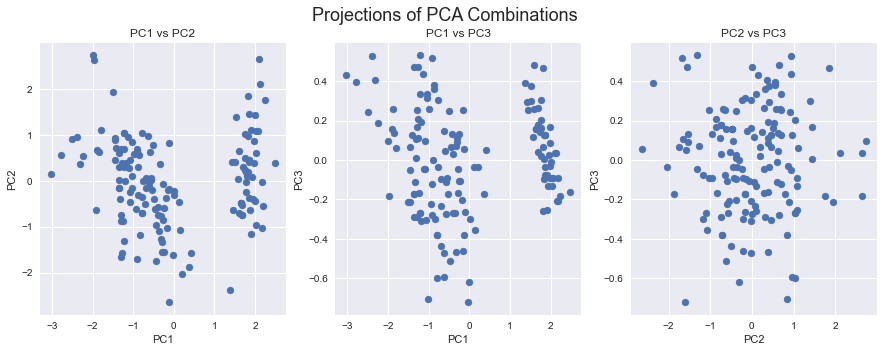

In [193]:
X = projection

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))


x1,y1 = X[:,0], X[:,1] # PC1 and PC2
x2,y2 = X[:,0], X[:,2] # PC1 and PC3
x3,y3 = X[:,1], X[:,2] # PC2 and PC3

ax[0].scatter(x1,y1)
ax[1].scatter(x2,y2)
ax[2].scatter(x3,y3)

ax[0].title.set_text('PC1 vs PC2')
ax[1].title.set_text('PC1 vs PC3')
ax[2].title.set_text('PC2 vs PC3')

ax[0].set(xlabel='PC1',ylabel='PC2')
ax[1].set(xlabel='PC1',ylabel='PC3')
ax[2].set(xlabel='PC2',ylabel='PC3')

fig.suptitle('Projections of PCA Combinations', fontsize=18)
plt.show()

**Notes for Eigenvalues**<p>
- In general, Eigenvalues indicate how much variance is in the data in a specific direction, the direction of the respective Eigenvector, large Eigenvalues indicate that the respective component (eigenvector) holds more variance. 
- Eigenvectors which hold the largest variance are the best components for PCA, therefore, the Eigenvalues can be used to create a ranking of the Components. 
- Small eigenvalues close to zero don't add much information, so their components might be discardable. 
- The component with the largest Eigenvalue is the principal component.